# **Relações**
<hr>


Muitos conjuntos de dados contêm duas ou mais variáveis, e podemos estar interessados ​​em como essas variáveis ​​se relacionam entre si. 
De certo modo muitos dos gráficos que estudamos nos capítulos anteriores podem ser usados e ajudam nessa análise. Os gráficos de linha, ajudam a entender a evolução de uma variável com outra, e no mesmo capítulo vimos o uso dos gráficos de dispersão. Os gráficos de caixa podem ser utilizados para representar a distribuição de uma variável com relação a diferentes valores de uma categoria, e também podemos empregar gráficos de barra ou gráficos emparelhados para apresentar valores com relação a diferentes classes. A divisão entre gráficos para representar Evolução, Distribuições, Quantidades e Proporções e, agora, Relações, ajuda a organizar o conteúdo indicando os gráficos mais comuns para cada propósito, mas de fato os gráficos permitem uma análise muito mais ampla e em geral representam múltiplos aspectos dos dados.

Os gráficos de dispersão, que vimos no capítulo de Evolução, são o tipo mais empregado para análise de relações entre duas variáveis quantitativas e você deve notar que muitos dos gráficos anteriores em que representamos relações dos dados tratam de relações entre uma variável quantitativa e categorias apenas. Aqui vamos explorar um pouco mais esse gráfico fazendo representações multidimensionais, empregando cores e diferentes tamanhos dos pontos de dados (gráfico de Bolhas) para representar novas dimensões em gráfico 2D (classes ou categorias de dados). 

O principal problema dos gráficos de dispersão é a criação de gráficos com *overplotting*. Um excesso de dados no gráfico em geral não permite identificarmos as relações e, no final, o objetivo da visualização é completamente prejudicado. Correlogramas são simplesmente gráficos de dispersão de diferentes pares de variáveis, o quê permite separar uma visualização de dados com muitas relações em diferentes gráficos mais fáceis de analisar individualmente. 

Por último ainda temos os mapas de calor que podem ser empregados para visualizar uma matriz de correlação dos dados e dados multivariados.



## Gráficos de Dispersão, *Scatter plots*

Basicamente os gráficos de dispersão, também chamados de gráfico de pontos ou diagramas de dispersão, representam duas variáveis quantitativas, uma para cada eixo, para detectarmos a presença de alguma relação ou correlação entre essas variáveis.

A partir dos padrões exibidos no gráfico você pode, por exemplo, identificar uma correlação positivas entre as variáveis (os valores aumentam em conjunto) ou negativa (um valor diminui à medida que o outros aumenta), pode identificar uma relação linear, ou ainda  um padrão exponencial ou polinomial (por exemplo em forma de U para polinômios de segundo grau). A força da correlação é expressa pela proximidade (concentração) dos pontos em torno do padrão e dados mais fora do agrupamento indicam a dispersão do padrão e *outliers*. É também comum, quando identificado esse padrão, adicionarmos uma linha de ajuste ou linha de tendência para inferência de valores, o que pode ser feito por métodos de aproximação, como regressão linear e outras formas de interpolação.

Um caso especial de relação e que muito nos interessa são relações lineares. De fato, correlação é um termo que deve ser empregado para relações lineares dos dados. O coeficiente de correlação é um número entre $[-1,1]$ é uma medida da relação linear entre duas variáveis quem que 1 é uma relação linear positiva perfeita, e -1 uma relação linear negativa perfeita. Identificada uma relação linear é comum então aproximarmos esses dados por uma regressão linear representando também essa aproximação no gráfico de dispersão como vimos no capítulo dos gráficos de Evolução. 

Mas os dados podem ter muitas outras relações e que também podemos aproximar por funções exponenciais, polinomiais etc. e um erro bastante comum é considerar que um coeficiente de correlação 0 indica *ausência* de relações entre os dados. O coeficiente de correlação 0 indica apenas a *ausência* de relações lineares entre os dados!

```{note}
Um erro bastante comum é considerar que um coeficiente de correlação 0 indica ausência de relações entre os dados. O coeficiente de correlação 0 indica apenas a ausência de relações lineares entre os dados!
```

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

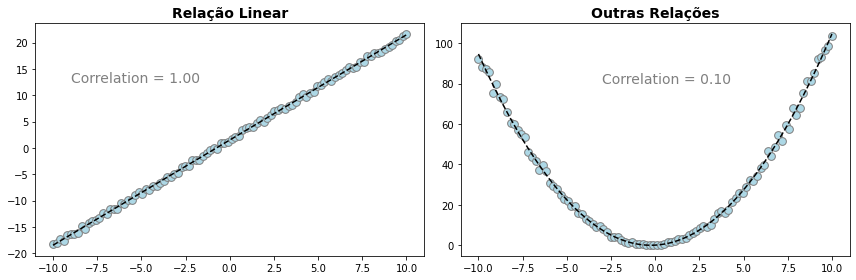

In [2]:
plt.figure(figsize=(12,4))
np.random.seed(99)
x = np.linspace(-10, 10, 100)
y1 = 2*(x + np.random.rand(len(x))*0.5) + 1
y2 = (x + np.random.rand(len(x))*0.5)**2

plt.subplot(1,2,1)
plt.scatter(x,y1, color='lightblue', s=60, edgecolors='grey')
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Relação Linear', fontsize=14, weight='bold')
plt.text(-9,12.5,f'Correlation = {np.corrcoef(x,y1)[0,1]:.2f}',fontsize=14, color='grey')

plt.subplot(1,2,2)
plt.scatter(x,y2, color='lightblue', s=60, edgecolors='grey')
z = np.polyfit(x, y2, 2)
p = np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Outras Relações', fontsize=14, weight='bold')
plt.text(-3,80,f'Correlation = {np.corrcoef(x,y2)[0,1]:.2f}',fontsize=14, color='grey')

plt.tight_layout()
plt.show()

Um outro alerta importante sobre relações é sobre sua interpretação e dois outros erros são bastante comuns. O primeiro é interpretarmos a presença de uma relação como uma relação de causa-efeito entre as variáveis. As variáveis podem, por exemplo, estarem sendo simplesmente determinadas por outros fatores , outra ou outras variáveis que não estão representadas e que talvez você desconheça. O segundo erro é considerarmos que se não encontramos relações na análise bivariada (duas variáveis) elas não tem então qualquer relação. Assumir isso, entretanto, é desconsiderar a existência de relações conjuntas (uma outra variável que, em conjunto, potencializa uma relação) que são mais difíceis de serem analisadas.

Gráficos de dispersão podem ser facilmente produzidos com a função `plt.scatter(x,y)` do `Matplotlib` indicando-se apenas as variáveis de interesse `x`e `y` de interesse. 

Essa é uma representação muito simples e, em geral, que explorar essa relação em outras dimensões adicionando à representação diferentes categorias ou classes de dados. Para isso podemos  empregar cores ou diferentes tamanhos dos pontos de dados. Isso pode ser feito com o `Matplotlib` e você pode, com ele, ter total controle sobre a representação dos dados, mas o pacote `Seaborn`, em geral, possui uma interface mais simples para análises multidimensionais.

## Um Gráfico de Dispersão Simples 

Vamos empregar aqui o data-set `gapminder` e explorar algumas relações entre os dados.

In [3]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/gapminder_2015.csv')
df['cod_continent'] = df[['continent']].astype('category').apply(lambda x: x.cat.codes)
df.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,VacineBelieve,ChildMortality,Co2Emissions,CPI,Population,cod_continent
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,NaN,40.7,2.560,63.0,2120000,0
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,NaN,86.8,0.182,38.0,18100000,0
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,NaN,90.0,0.405,32.0,23200000,0
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,NaN,23.6,2.370,36.0,92400000,0
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,NaN,46.3,0.341,25.0,47900000,0


O gráfico abaixo mostra o gráfico de pontos para os valores de renda anual por habitante e expectativa de vida, variáveis para as quais esperamos alguma relação. O gráfico pode ser obtido diretamente apenas informando as variáveis envolvidas:

```
plt.scatter(df['income_per_person'],df['LifeExpect']))
```


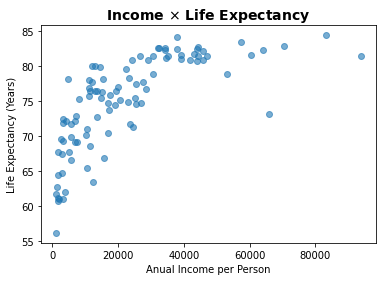

In [4]:
plt.scatter(df['income_per_person'],df['LifeExpect'] , alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.show()



### Adicionando Dimensões com Cores
Mas em geral, queremos ainda adicionar outras dimensões aos dados. 

Antes vamos entender melhor como podemos atribuir cores. Já empregamos esquemas de cores antes mas eles tinham um propósito mais ornamental na construção dos gráficos. Aqui, entretanto, eles vão passar a representar valores dos dados permitindo criarmos representações multidimensionais mesmo com gráficos 2D. É essencial então entendermos claramente como atibuir esses valores. 

Existem muitas formas de se fazer isso e deixo aqui uma forma que parece bastante útil e flexível, podendo ser empregada em muitas outras situações. A ideia é criar um dicionário que mapeando os valores às cores desejadas. Para as diferentes cores podemos usar os rótulos já conhecidos 'r','g,'b' etc. ou ainda 'red', 'lightblue', 'yellow' etc., mas também podemos empregar os esquemas de cores do `Matplotlib` ou do `Seaborn` que fornecem espectros de cores mais elaboradas. Abaixo mostramos como empregar esses 3 esquemas para associar cores diferentes a cada continente e, assim, adicionar mais essa dimensão à representação dos dados.

In [5]:
dict(zip(df.continent.unique(), ['r','g','b','c','m']))

{'Africa': 'r', 'Americas': 'g', 'Asia': 'b', 'Europe': 'c', 'Oceania': 'm'}

In [6]:
from matplotlib import cm
dict(zip(df.continent.unique(), cm.viridis(len( df.continent.unique() )) ) )

{'Africa': 0.273809, 'Americas': 0.031497, 'Asia': 0.358853, 'Europe': 1.0}

In [7]:
sns.color_palette("Set2", len(df.continent.unique()))

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [8]:
dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

{'Africa': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Americas': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Asia': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Europe': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'Oceania': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

Esses dicionários podem ser então empregados para *mapear* cada valor de `continent` com o método `map`.  

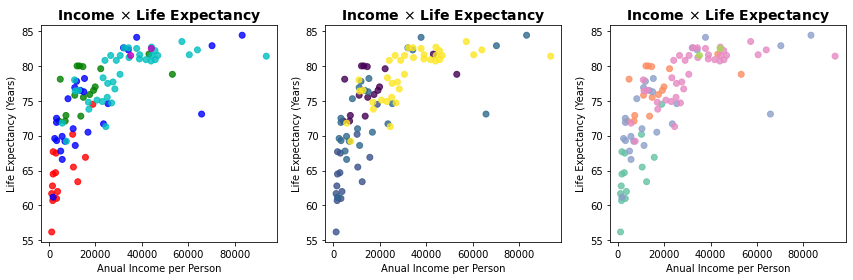

In [9]:
plt.figure(figsize=(12,4))

colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))
colors2 = dict(zip(df.continent.unique(), cm.viridis(len( df.continent.unique() )) ) )
colors3 = dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

colors = [ colors1, colors2, colors3 ]

for i in range(len(colors)):
  plt.subplot(1,3,i+1)
  plt.scatter(df['income_per_person'], df['LifeExpect'], alpha=0.8, 
              c = df['continent'].map(colors[i]))

  plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
  plt.xlabel('Anual Income per Person')
  plt.ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.show()


Independente do esquema que você escolher, será inútil empregar diferentes cores se você não puder associar para o leitor os valores que cada cor representa. Você pode fazer isso a partir das legendas. 

Com o `Matplotlib` a forma mais simples de fazer isso é adicionando camadas de plot dos gráficos para cada dimensão desejada. Isso está no segundo gráfico primeiro gráfico abaixo onde o laço de programa (`for`) percorrer cada um dos valores da dimensão `continent` para adicionar uma nova camada de pontos com essa dimensão dos dados no gráfico. Cada nova camada recebe uma cor e rótulo diferente para representar essa nova dimensão.

Essa forma de construção é a mais simples. Mas o mesmo gráfico pode ser construído sem uso de iterações plotando todos os pontos e indicando um array de cores para cada ponto como fizemos antes. Essa opção, entretanto, torna a adição de legendas um pouco mais complexa sendo necessário editar a legenda em separado. A construção desse modo encontra-se no segundo gráfico abaixo.

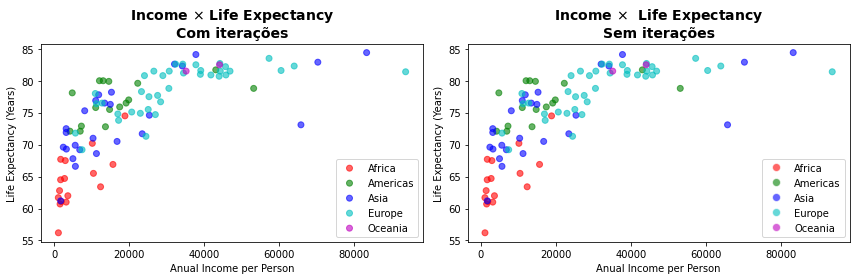

In [10]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'], 
            df['LifeExpect'] ,
            c=df['continent'].map(colors1),
            alpha=0.6)

plt.title('Income $\\times$  Life Expectancy\nSem iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

# Adicionando a legenda
from matplotlib.lines import Line2D
legends = []
for color in colors1.values():
  legends.append( Line2D([0], [0], markerfacecolor=color, marker='o', markersize=8, color='w', alpha=0.6) )

plt.legend(legends, df['continent'].unique())

plt.tight_layout()
plt.show()



Uma alternativa útil pode ser empregar o gráfico sem iterações até obter a figura desejada e, então, produzir o gráfico desejado por meio de iterações adicionando a legenda.



### `Seaborn`, `hue`

O `Seaborn` voltado para análises multidimensionais já fornece um parâmetro para adição de dimensões de classes de dados. O parâmetro `hue` indica a classe de valores em que serão exibidos os dados e pode ser empregado na maior parte dos comandos do `Seaborn`.  

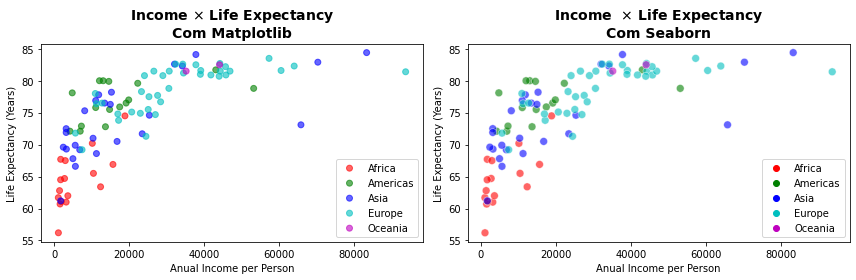

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom Matplotlib', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
colors = sns.color_palette(['r','g','b','c','m'])

sns.scatterplot(x=df['income_per_person'], 
            y=df['LifeExpect'] ,
            hue=df['continent'],
            palette=colors,
            s=60,
            alpha=0.6)

plt.title('Income  $\\times$ Life Expectancy\nCom Seaborn', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.tight_layout()
plt.show()



### Usando `markers`

A adição de novas dimensões (classes de dados) pode ser feita também com markers do gráfico, mas mesmo para poucas classes essa solução facilmente leva ao *overplotting* da representação como você pode ver abaixo e é necessário uma escolha cuidadosa da representação. 

Empregamos abaixo um esquema semelhante ao que empregamos para cores para associar diferentes `markers` a cada valor de `continent`, empregando diretamente o dicionário no parâmetro `marker`.

In [12]:
dict(zip(df.continent.unique(), ['>','+','x','o','*']))

{'Africa': '>', 'Americas': '+', 'Asia': 'x', 'Europe': 'o', 'Oceania': '*'}

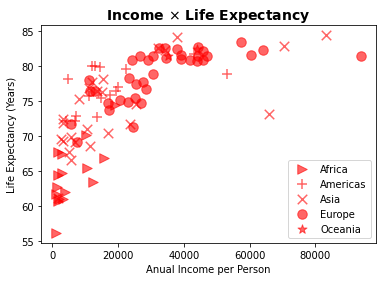

In [13]:
markers = dict(zip(df.continent.unique(), ['>','+','x','o','*']))

for continent in  df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              marker=markers[continent],
              s=90,
              c='red',
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')
plt.legend()

plt.show()


## Adicionando Dimensões Contínuas e Gráficos de Bolha

Diferentes tamanhos e cores dos pontos de dados também podem ser empregados para adicionarmos um dimensão de uma variável quantitativa contínua e não somente classes de dados como fizemos nos gráficos anteriores adicionando a dimensão `continent` aos gráficos. 

Em geral, neste caso, empregamos círculos como marcadores e um gráfico de bolhas é um gráfico multivariável que adiciona uma dimensão de uma variável quantitativa a um gráfico de dispersão sendo a área do círculo, ou a intensidade de cor, proporcional a grandeza contínua que representa. 

Podemos assim empregar os tamanhos ou cores para, por exemplo, para adicionar as dimensões `SchoolYears15_24` ou `HappyIdx`, que são valores contínuos, ao gráfico de dados de renda e expectativa de vida e explorar conjuntamente essas relações. 

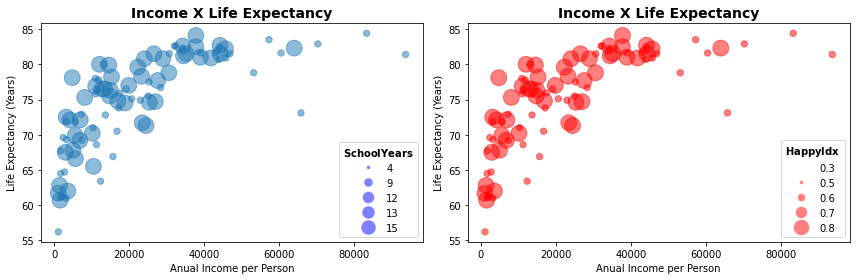

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(40,250),
              s=df['SchoolYears15_24'],
              alpha=0.5)

plt.title('Income X Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

from matplotlib.lines import Line2D
legends = []
valores = np.round( df['SchoolYears15_24'].quantile([0,0.25,0.5,0.75,1]), 0).astype('int') 
for size in valores:
  legends.append( Line2D([0], [0], markerfacecolor='blue', marker='o', markersize=size, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(40,250),
              s=df['HappyIdx'],
              alpha=0.5,
              c='red')

plt.title('Income X Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

from matplotlib.lines import Line2D
legends = []
valores = np.round( df['HappyIdx'].quantile([0,0.25,0.5,0.75,1]), 1) 
for size, _ in enumerate(valores):
  legends.append( Line2D([0], [0], markerfacecolor='red', marker='o', markersize=size*4, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{Happy Idx}$')

plt.tight_layout()
plt.show()

Não é sem surpresa que você pode notar acima uma proximidade muito grande dos padrões de anos de escolaridade e índice de felicidade dos países. E é exatamente esse o objetivo desses gráficos, fornecer padrões que nos permitem encontrar relações entre os dados. Você pode, então, aprofundar essa exploração com outros gráficos sobre essas variáveis. 


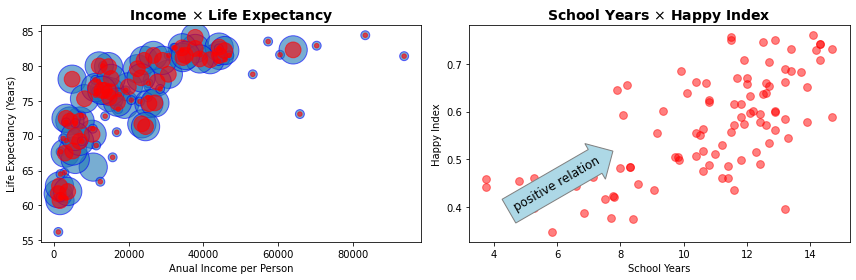

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(80,800),
              s=df['SchoolYears15_24'],
              alpha=0.6,
              edgecolor='b')
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(20,250),
              s=df['HappyIdx'],
              alpha=0.6,
              edgecolor='r',
              c='red')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(1,2,2)
plt.scatter(df['SchoolYears15_24'], 
              df['HappyIdx'],
              s=60,
              c='r',
              alpha=0.5)

plt.title('School Years $\\times$ Happy Index', fontsize=14, weight='bold')
plt.xlabel('School Years')
plt.ylabel('Happy Index')


bbox_props = dict(boxstyle="rarrow", fc='lightblue', ec='grey', lw=1)
t = plt.text(6, 0.45, 'positive relation', ha="center", va="center", rotation=30,
            size=12, bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

plt.tight_layout()
plt.show()

Como acima, você pode, produzir um gráfico de bolhas com escalas diferentes para dimensões `SchoolYears15_24` ou `HappyIdx` identificando as intersecções ou, ainda, simplesmente, construir um gráfico de pontos com as duas variáveis e observar a relação positiva entre elas.

## Adicionando Dimensões Contínuas com Cores

Podemos também empregar diferentes níveis de cores dos pontos de dados para representar uma variável quantitativa contínua. 

Neste caso o mapeamento de cores pode ser feito diretamente com o parâmetro `camp` associado a um esquema de cores de sua preferência e, representando valores contínuos, é mais útil empregarmos uma escala de cores no lugar de uma legenda de valores. No `Matplotlib` isso pode ser feito com o comando `colorbar()`. 

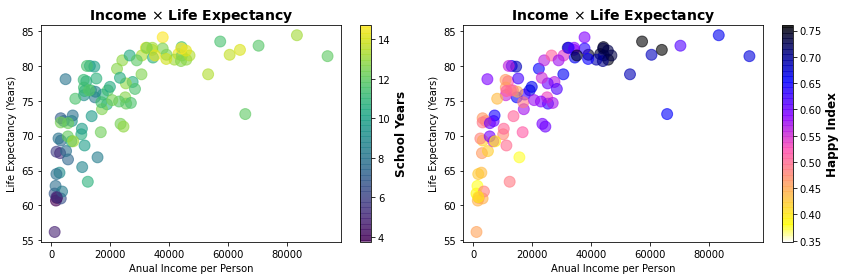

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['SchoolYears15_24'], cmap=cm.viridis )

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('School Years', fontsize=12, weight='bold')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['HappyIdx'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('Happy Index', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

## Usando o `Seaborn`

De modo semelhante os mesmos gráficos podem ser produzidos com o pacote `Seaborn`. Para criar gráficos de bolhas empregue os parâmetros `hue` e `size` para associar uma variável quantitativa ao tamanho dos círculos. O parâmetro `sizes` indica os diâmetros mínimo e máximo dos círculos a que o valores da variável serão associados proporcionalmente. Você pode verificar que o resultado não será tão bom se você empregar o `size`, sem empregar o parâmetro `hue` que define as classes de valores a serem exibidos. Já ao empregar uma escala de cores para representar uma nova dimensão de valores contínuos é necessário empregar alguns artifícios para exibir a barra de escala de valores e excluir a legenda automática do `Seaborn`. O artifício consiste em criar um `plot` nulo do `Matplotlib` com a barra de cores e a legenda é excluída em um comando separadamente.

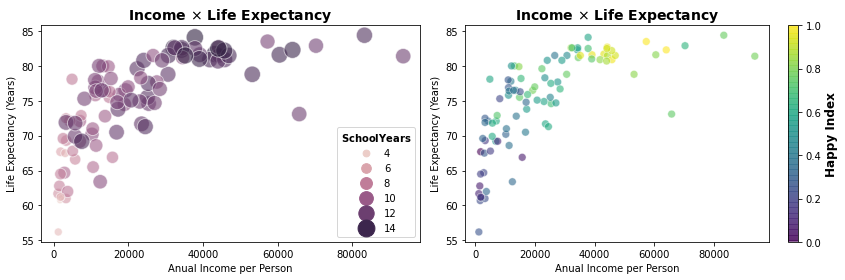

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
scatter= sns.scatterplot(x=df['income_per_person'], 
            y=df['LifeExpect'] ,
            hue=df['SchoolYears15_24'],
            sizes=(40,300),
            size=df['SchoolYears15_24'],
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt_colbar = plt.scatter([], [],
            s=60,
            alpha=0.6,
            cmap=cm.viridis)

scatter = sns.scatterplot(x=df['income_per_person'], 
            y=df['LifeExpect'] ,
            c=df['HappyIdx'],
            hue=df['HappyIdx'],
            palette=cm.viridis,
            s=60,
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar(plt_colbar)
cbar.set_label('Happy Index', fontsize=12, weight='bold')
scatter.get_legend().remove()

plt.tight_layout()
plt.show()



Ao final, o uso do `Matplotlib` ou do `Seaborn` para gráficos de dispersão não parecem apresentar muita diferença para construção de gráficos simples e, para dados multidimensionais, cada um apresenta uma dificuldade particular para o  customização final dos gráficos (as legendas, por exemplo). Mas para gráficos multidimensionais e exploratórios o `Seaborn` ainda parece oferecer uma interface mais simples e ágil de usar.  

## Linha de Ajuste

Você pode retornar ao capítulo de Evolução para verificar detalhes como adicionar linhas de tendências em gráficos de pontos. Lá aplicamos o mesmo procedimento que empregaremos aqui empregando uma função de otimização para o ajuste de curvas do pacote `Spicy`. 

O que adicionamos aqui é um artifício bastante comum aplicado a uma série de dados populacionais como renda, mas também dados de preços de imóveis e veículos etc. que apresentam uma distribuição exponencial. Relações lineares são sempre mais fáceis de serem empregadas e podemos empregar o artíficio de transformar com uma distribuição exponencial aplicando uma transformação de $log( )$ para obter uma relação linear dos dados.

In [18]:
# Produzindo o ajuste da curva
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.log(x) + b

coefs, covar = curve_fit(func, df['income_per_person'], df['LifeExpect'])

x = np.linspace(df['income_per_person'].min(), df['income_per_person'].max(), 100)
y = func(x,*coefs)

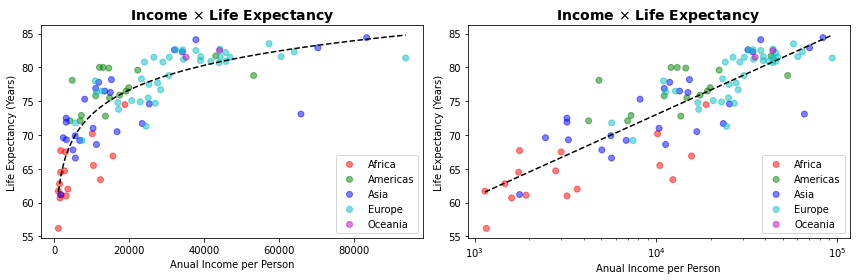

In [19]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.xscale('log')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(loc='lower right')


plt.tight_layout()
plt.show()

Você pode notar como o primeiro gráfico se ajusta a uma função logarítimica e, alterando a escala de $x$ para uma escala logarítimica o ajuste linear. Veja os coeficientes de correlação obtidos em cada caso.

In [21]:
from IPython.display import display, Math, Latex 
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(df["income_per_person"],df["LifeExpect"])[0,1]:.3f}')  

<IPython.core.display.Math object>

In [22]:
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(np.log( df["income_per_person"] ),df["LifeExpect"])[0,1]:.3f}')  

<IPython.core.display.Math object>

## Correlogramas

Correlogramas nada mais são do que vários gráficos de pontos diferentes pares de variáveis para que você possa explorar relações entre elas. Esse é um modo de evitarmos o *overplotting* e dividirmos o problema em partes explorando individualmente cada par de variáveis.

Podemos fazer isso com o `Matplotlib`, mas havendo várias variáveis pode ser necessário fazer um laço de programa para produzir os diferentes gráficos de dispersão de cada par de variável (em geral empregamos somente as quantitativas, numéricas) e logo a seguir você verá um laço de programa como esse. Mas o `Seaborn` já fornece uma função para exibir, em um único comando, os diferentes pares de variáveis e é, geralmente, a forma mais empregada para isso. Apenas para fins de apresentação limitamos as variáveis a serem exploradas. De qualquer, embora possível, é recomendável evitar execuções do tipo `sns.pairs(df)` que levam muito tempo para serem processadas e, em muitos casos, produzindo gráficos desnecessários (variáveis categóricas também são incluídas neste caso).

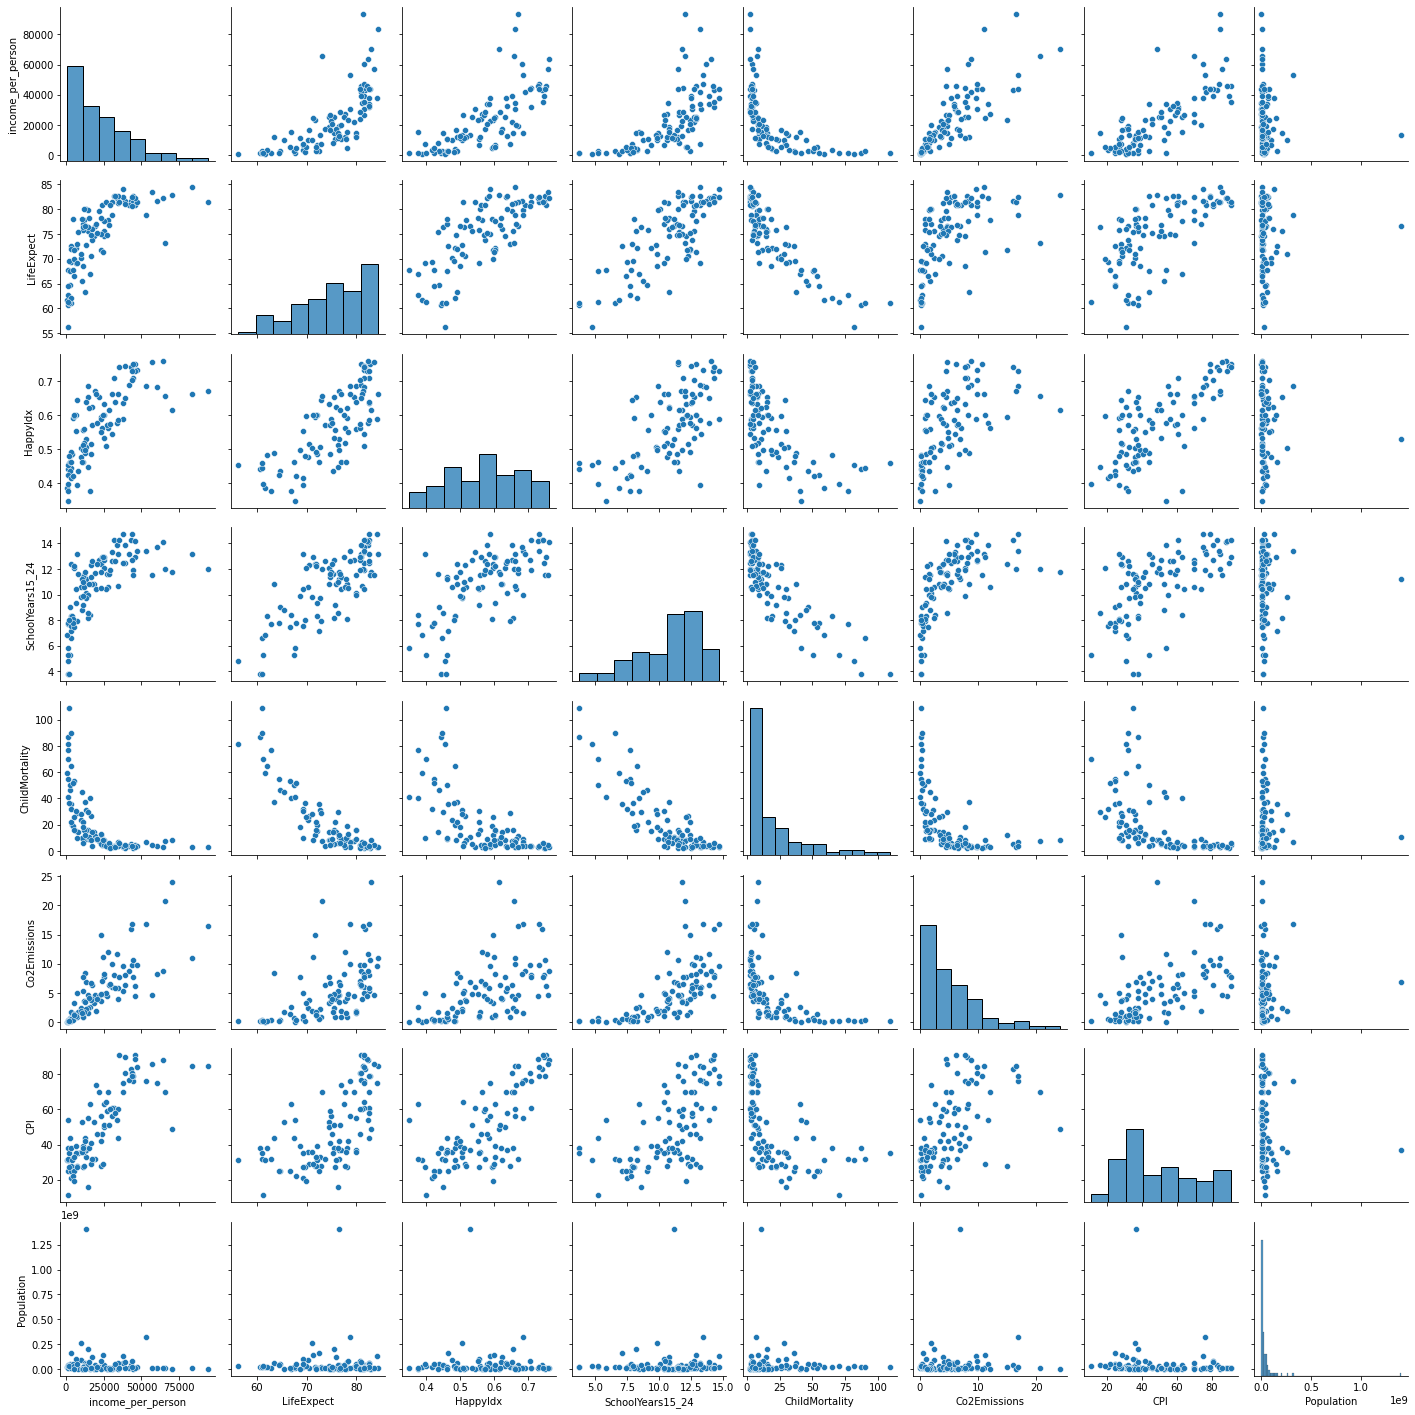

In [23]:
sns.pairplot(df[['income_per_person', 'LifeExpect', 'HappyIdx','SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
            'CPI', 'Population']])
plt.show()

Observando o gráfico acima algumas relações se destacam apresentando uma relação mais próxima da linear como  'LifeExpect' $\times$ 'ChildMortality' e 'SchoolYears15_24' $\times$ 'ChildMortality'. 

De fato, essas são relações que apresentam um coeficiente de correlação bastante alto e podemos identificar essas maiores correlações produzindo uma matriz de correlação desses pares de variáveis e identificando seus maiores valores.

In [24]:
pd.options.display.max_rows = 999
df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

,income_per_person,LifeExpect,HappyIdx,SchoolYears15_24,ChildMortality,Co2Emissions,CPI,Population
income_per_person,1.000000,0.710835,0.727471,0.652686,-0.600019,0.796020,0.805391,-0.052656
LifeExpect,0.710835,1.000000,0.750452,0.772257,-0.878321,0.532751,0.651758,0.017118
HappyIdx,0.727471,0.750452,1.000000,0.661920,-0.656261,0.558667,0.729569,-0.030911
SchoolYears15_24,0.652686,0.772257,0.661920,1.000000,-0.851195,0.628866,0.583404,0.023106
ChildMortality,-0.600019,-0.878321,-0.656261,-0.851195,1.000000,-0.542851,-0.527718,-0.039804
Co2Emissions,0.796020,0.532751,0.558667,0.628866,-0.542851,1.000000,0.558390,0.059660
CPI,0.805391,0.651758,0.729569,0.583404,-0.527718,0.558390,1.000000,-0.086626
Population,-0.052656,0.017118,-0.030911,0.023106,-0.039804,0.059660,-0.086626,1.000000


In [25]:
df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr().abs().unstack().drop_duplicates().sort_values(ascending=False).nlargest(5)

income_per_person  income_per_person    1.000000
LifeExpect         ChildMortality       0.878321
SchoolYears15_24   ChildMortality       0.851195
income_per_person  CPI                  0.805391
                   Co2Emissions         0.796020
dtype: float64

Identificados os pares de interesse, isto é, aqueles que apresentam algum tipo de relação, você aprofundar a análise, por exemplo, produzindo as linhas de tendência de dessas variáveis entre outras análises.

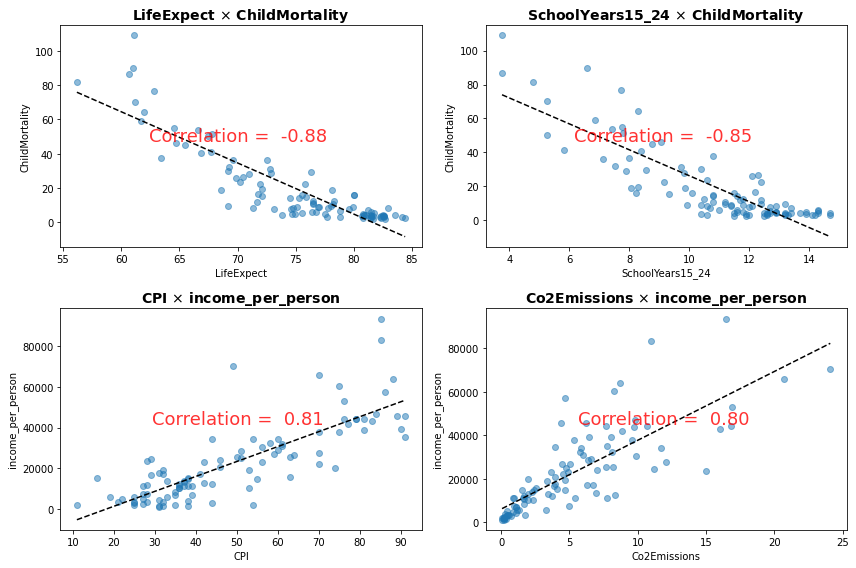

In [26]:
plt.figure(figsize=(12, 8)) 

def linear(x, a, b):
    return a*x + b

for i, pairs in enumerate( [ ['LifeExpect','ChildMortality',],
                ['SchoolYears15_24','ChildMortality'],
                ['CPI','income_per_person'],
                ['Co2Emissions','income_per_person'] ] ): 
 
  coefs, covar = curve_fit(linear, df[pairs[0]], df[pairs[1]])
  x = np.linspace(df[pairs[0]].min(), df[pairs[0]].max(), 100)
  y = linear(x,*coefs)

  plt.subplot(2,2,i+1)
  plt.scatter(df[pairs[0]], df[pairs[1]], alpha=0.5)

  plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

  texto = f'Correlation =  {df[[pairs[0],pairs[1]]].corr().unstack()[1]:.2f} '
  plt.text(( plt.gca().get_xlim()[1] + plt.gca().get_xlim()[0])/2,
           ( plt.gca().get_ylim()[1] + plt.gca().get_ylim()[0])/2,
           texto, ha='center', va='center', fontsize=18, color='red', alpha=0.8)

  plt.title(pairs[0] + ' $\\times$ ' + pairs[1], fontsize=14, weight='bold')
  plt.xlabel(pairs[0])
  plt.ylabel(pairs[1])

plt.tight_layout()
plt.show()

É importante que você note que, embora tenhamos aqui identificado e trabalhado relações lineares dos dados (e que por isso apresentam alto coeficiente de correlação), o correlograma não se limita a apresentar somente relações lineares e poderia apresentar outros padrões de relacionamento entre os pares de variáveis.

In [27]:
df.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,VacineBelieve,ChildMortality,Co2Emissions,CPI,Population,cod_continent
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,NaN,40.7,2.560,63.0,2120000,0
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,NaN,86.8,0.182,38.0,18100000,0
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,NaN,90.0,0.405,32.0,23200000,0
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,NaN,23.6,2.370,36.0,92400000,0
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,NaN,46.3,0.341,25.0,47900000,0


## Mapas de Calor

Mapas de Calor ou *Heat Maps* permitem visualizar dados multivariados exibindo variáveis ​​discretas (categóricas ou numéricas) nas linhas e colunas e uma dimensão quantitativa colorindo as células do conjunto retangular de linhas e colunas. Os mapas de calor são bons para mostrar a variação em várias variáveis e grupos de dados que apresentam um mesmo padrão de valores. 

Um cuidado a ser tomado é na escolha do esquema de cores a ser empregado. Caso você não opte pelo esquema padrão tenha cuidado na escolha do esquema de cores, dando preferência aos esquemas cíclicos ou simplesmente sequenciais que permitem mais facilmente associar uma escala de cores a uma escala de valores. 

### Mapa de Correlação

Um caso especial muito comum de empregarmos Mapas de Calor é para exibirmos uma matriz de correlação. Esse gráfico pode substituir o Correlograma para a identificação de correlações fortes entre os dados, isto é, relações lineares. Mas lembre que podem haver outros padrões de relação dos dados e, neste caso, relações não lineares não podem ser identificadas pelo Mapa de Correlação sendo mesmo necessário o uso de Correlograma ou outras análises.

O `Matplotlib` não possui nenhuma função específica para mapas de calor, mas podemos empregar a função de exibição de imagens `imshow()` para construir mapas de calor e basta passar para a função uma matriz de valores. Os rótulos nesse caso precisam ser inseridos manualmente.

O `Seaborn` já tem uma função específica para produzir mapas de calor e a função `heatmap` espera receber um `narray` ou `DataFrame` Pandas e, neste caso, empregará as informações de índice e coluna para rotular o gráfico.

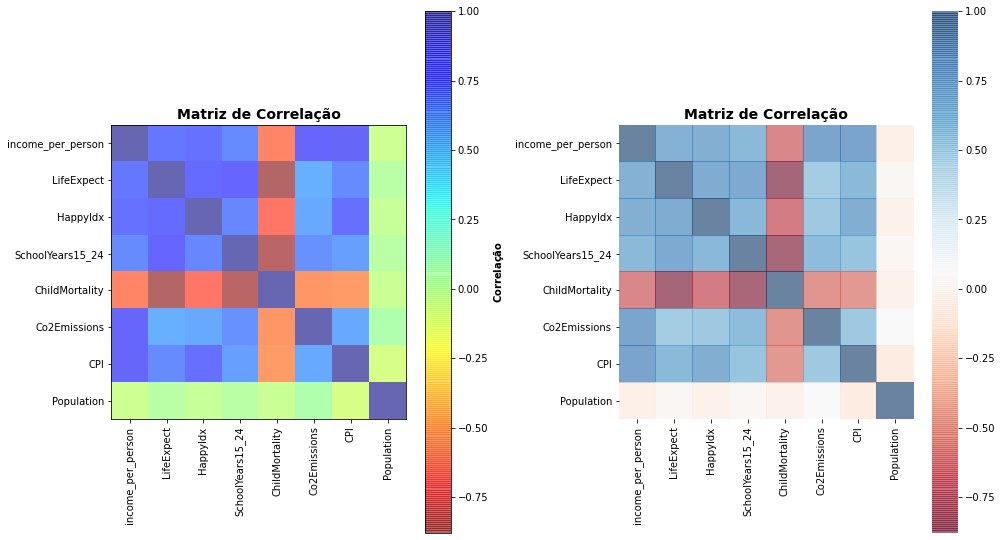

In [28]:
plt.figure(figsize=(14,8))

matriz = df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6) 

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Em quaisquer dos gráficos acima você pode indentificar, por exemplo, a alta correlação de `ChildMortality` para diversos indicadores e baixa correlação de `Population` do mesmo modo que observamos no Correlograma.

### Variáveis Categóricas e uma Dimensão Quantitativa

Um Mapa de Calor é uma representação de uma matriz retangular e, assim, as linhas e colunas correspondem a valores discretos dos dados enquanto uma terceira variável quantitativa corresponde ao valor na linha/coluna que será exibido com alguma cor representando suas quantidades. 

Para exemplificar este caso vamos empregar o dataset `mpg` e representar os a média dos valores de `mpg` ao longo dos anos e por origem dos veículos. Neste exemplo vamos empregar apenas o `Seaborn`. 

Boa parte do trabalho para construir um Mapa de Calor está em criar a matriz de dados. 

In [29]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


As operações abaixo permitem criar uma matriz onde os valores de média de `mpg` são únicos para cada par `origin`/`model_year`, respectivamente as linhas e colunas da nossa matriz.

In [30]:
mpg_group = pd.DataFrame(mpg.groupby(['origin', 'model_year']).mpg.mean()).reset_index()

In [31]:
mpg_group.pivot('origin',	'model_year',	'mpg' )

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.75,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,37.288889,31.575000,40.000000
japan,25.500000,29.50,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.400000,32.958333,34.888889
usa,15.272727,18.10,16.277778,15.034483,18.333333,17.55,19.431818,20.722222,21.772727,23.478261,25.914286,27.530769,29.450000


Podemos então exibir o Mapa de Calor.

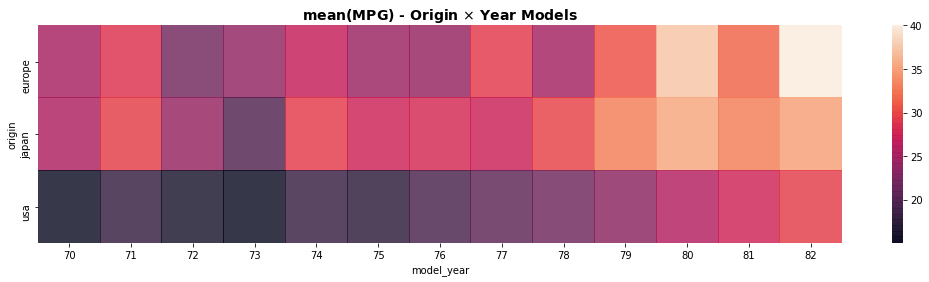

In [32]:
plt.figure(figsize=(18,4))
          
sns.heatmap(mpg_group.pivot('origin',	'model_year',	'mpg' ), alpha=0.8)

plt.title('mean(MPG) - Origin $\\times$ Year Models', fontsize=14, weight='bold')
plt.show()

A representação ajuda, por exemplo, a identificar que os veículos se tornam mais econômicos ao longo dos anos (maiores valores de `mpg`) e, em particular a Europa, no período, lidera a corrida por carros econômicos chegando a produzir veículos que fazem em média cerca de 40 mpg (parte superior direita do gráfico).

### Mapa de Calor e Várias Medidas Quantitativas

É menos comum, mas também podemos apresentar várias quantitativas em um Mapa de Calor e isso pode ser útil em muitos casos. 

O que podemos observar com esse tipo de gráfico é um pouco diferente dos gráficos anteriores. A primeira coisa que você precisa notar é que havendo várias variáveis quantitativas elas podem apresentar diferentes escalas de valores e, como só temos a dimensão cor para representar os valores, será necessário normalizar os dados e a representação dos valores será assim relativa. 

Abaixo você encontra um exemplo e, no primeiro gráfico, empregamos os valores sem normalização para que você entenda o que ocorre. Como existem muitos dados separamos somente os dados dos top 10 e low 10 países com base na renda per capta para examinarmos simultâneamente todas as variáveis quantitativas de cada país.

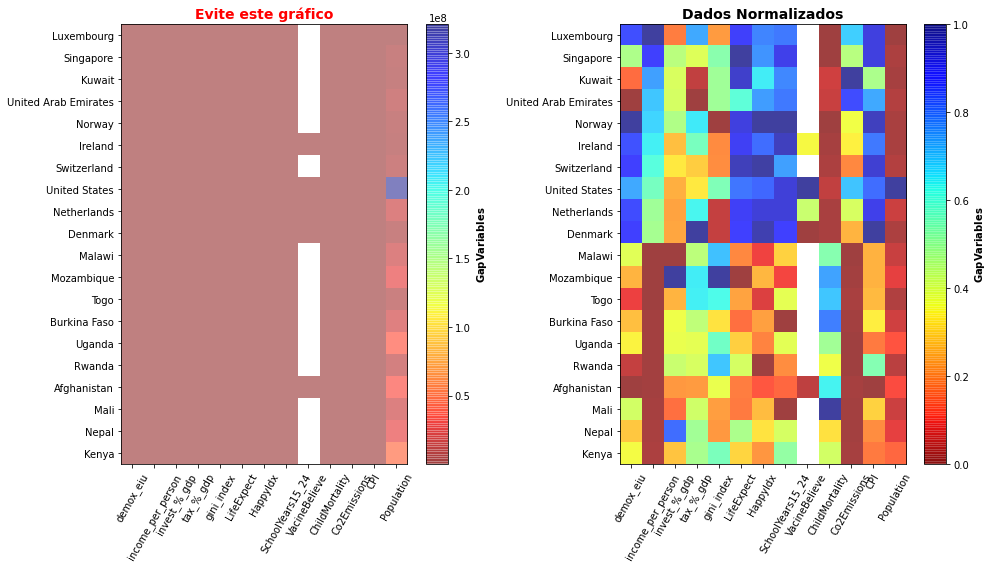

In [33]:
dfTop10 = df.nlargest(10,columns='income_per_person')
dfLow10 = df.nsmallest(10,columns='income_per_person')

df10 = pd.concat([dfTop10,dfLow10])

matriz = df10.drop(columns=['continent', 'country', 'year', 'cod_continent'])
matriz_norm =(matriz-matriz.min())/(matriz.max()-matriz.min())
  
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r',alpha=0.5)
plt.yticks(np.arange(len(df10['country'])),df10['country'])
plt.xticks(np.arange(len(matriz.columns)),matriz.columns, rotation=60)
cbar = plt.colorbar()
cbar.set_label('$\\bf{Gap Variables}$')

plt.title('Evite este gráfico', fontsize=14, weight='bold', color='r')

plt.subplot(1,2,2)
plt.imshow(matriz_norm, cmap='jet_r',alpha=0.75)
plt.yticks(np.arange(len(df10['country'])),df10['country'])
plt.xticks(np.arange(len(matriz_norm.columns)),matriz_norm.columns, rotation=60)
cbar = plt.colorbar()
cbar.set_label('$\\bf{Gap Variables}$')

plt.title('Dados Normalizados', fontsize=14, weight='bold')


plt.tight_layout()
plt.show()



Os resultados talvez não supreendam você, mas o gráfico permite que você observe bastante claramente que o grupo dos países de maior renda apresentam valores bastante superiores de vários índices de desenvolvimento como índice de felicidade, expectativa de vida e anos de escolaridade (valores em azul na parte superior do mapa). Permitem também ver que o grupo de menor renda apresenta níveis baixos de emissões de CO2 e que, este sim um dado que parece surpreendente, os países ricos tem o maior nível de CPI  (Corruption Perceptions Index). A linha branca que você encontra no gráfico também é uma informação útil e indica valores ausentes para `VacineBelieve` para uma série de países e, muitas vezes mapas de calor são uma forma rápida de mapearmos valores ausentes quando temos centenas de atributos de dados.  

## Análise de Componentes Principais

Criado por Karl Pearson (o mesmo estatístico do coeficiente de Pearson) o PCA é uma técnica estatística para redução de dimensionalidade dso dados. O PCA converte um conjunto de variáveis correlacionadas num conjunto de valores linearmente não correlacionadas chamados de componentes principais. A ideia desse procedimento é que os componentes principais (de 1 até o no máximo o número de variáveis consideradas) representam a variância dos dados em ordem decrescente e, assim, podemos empregar dois componentes principais, isto é, duas novas variáveis criadas a partir das variáveis originais para exibir nos dados no plano representando uma grande parte da variância dos dados.

Para construir isso vamos empregar a função PCA do `Scikit-Learn`. Como o PCA é sensível a normalização vamos primeiramente preparar os dados eliminando valores ausentes e normalizando os dados. Com vimos na seção anterior temos um grande número de ocorrências com ausência de valores para `VacineBelieve`, vamos então eliminar esse atributo e, sem prejuízo, excluir as demais linhas com valores nulos para gerar os componentes principais a partir das mesmas variáveis dos países que empregamos no Correlograma mais atrás. 



In [34]:
print('Dados com Valores ausentes:', df.isnull().values.any())
df = df.drop(columns=['VacineBelieve'])
df = df.dropna().reset_index(drop=True)
print('Dados com Valores ausentes:', df.isnull().values.any())

Dados com Valores ausentes: True
Dados com Valores ausentes: False


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['income_per_person', 'LifeExpect', 'HappyIdx','SchoolYears15_24', 'ChildMortality', 'Co2Emissions', 'CPI', 'Population']]
features = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = features)
X.head()

,income_per_person,LifeExpect,HappyIdx,SchoolYears15_24,ChildMortality,Co2Emissions,CPI,Population
0,-0.378566,-1.239440,-1.850791,-0.980125,0.945894,-0.574424,0.642906,-0.308834
1,-1.104401,-2.172864,-1.226559,-2.817651,2.984586,-1.061338,-0.533444,-0.202322
2,-1.020492,-2.127698,-1.198185,-1.696919,3.126100,-1.015677,-0.815768,-0.168329
3,-0.661693,-0.742618,-0.904986,-0.108884,0.189676,-0.613328,-0.627552,0.292911
4,-1.042628,-1.570655,-1.283308,-0.718753,1.193544,-1.028782,-1.145146,-0.003695


In [36]:
pca = PCA(n_components=2)
PC2 = pca.fit_transform(X)

PC2 = pd.DataFrame(PC2, columns = ['PComp1','PComp2']) 


In [37]:
df = pd.concat([df,PC2],axis=1)
df.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,ChildMortality,Co2Emissions,CPI,Population,cod_continent,PComp1,PComp2
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,40.7,2.560,63.0,2120000,0,2.044587,-0.613808
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,86.8,0.182,38.0,18100000,0,4.537997,-0.822175
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,90.0,0.405,32.0,23200000,0,4.185610,-0.644831
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,23.6,2.370,36.0,92400000,0,1.455138,0.401299
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,46.3,0.341,25.0,47900000,0,3.022230,-0.005218


Esses dois componentes compreendem respectivamente 0.63 e 0.12 da variância dos dados e, portanto, podemos contar que uma representação com apenas essas duas dimensões estará representando 0.75 (75%) da variância dos dados, um valor bastante bom para termos uma representação de dados em duas dimensões uma vez que não podemos representar visualmente as 8 dimensões dos dados.


In [39]:
pca.explained_variance_ratio_

array([0.63095752, 0.12962208])

Podemo agora exibir esses dados em um gráfico de pontos e rotular os dados com cores, por exemplo, com o respectivo continente.

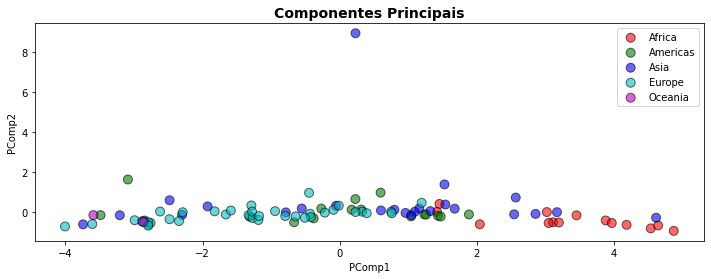

In [38]:
plt.figure(figsize=(12,4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['PComp1'], 
              df[ df['continent'] == continent ]['PComp2'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              s = 80,
              edgecolor='k',
              alpha=0.6)

plt.title('Componentes Principais', fontsize=14, weight='bold')
plt.xlabel('PComp1')
plt.ylabel('PComp2')

plt.legend()
plt.show()

O gráfico, então, exibe algumas diferenças importantes entre os continentes. A Europa e América, quando comparadas com a África estão claramente em posições opostas do gráfico representando as diferenças dos 8 indicadores (as variáveis originais) de desenvolvimento que empregamos. A Asia, como sabemos, apresenta países várias condições diferentes, indo do mais alto aos níveis mais baixos de desenvolvimento.  

A análise de componentes principais, e a análise de fatores, são técnicas estatísticas bastante elaboradas e que envolvem muito mais elementos do que vemos aqui, mas para o aspecto de reduzir dimensões para a exibição de dados esta introdução parece bastante suficiente, e com essas ferramentas e as que vimos nos demais capítulos você estará bastante apto a encontrar e analisar várias possíveis relações entre dados.